CSV file csv_path.csv created successfully
{FattyAcid(length=8, db_positions=(), db_stereo=(), branches=()): 0.0022530051796354777, <glyze.glyceride.Glyceride object at 0x112740d50>: 0.1266354661218685, <glyze.glyceride.Glyceride object at 0x137438150>: 0.18417927620189878, <glyze.glyceride.Glyceride object at 0x156cc79b0>: 0.021767589283020652, <glyze.glyceride.Glyceride object at 0x156d15f40>: 0.36835855240379756, <glyze.glyceride.Glyceride object at 0x156d16210>: 0.06331773306093427, 'Glycerol': 0.5357413829284796, 'H2O': 0.9977469948203638}


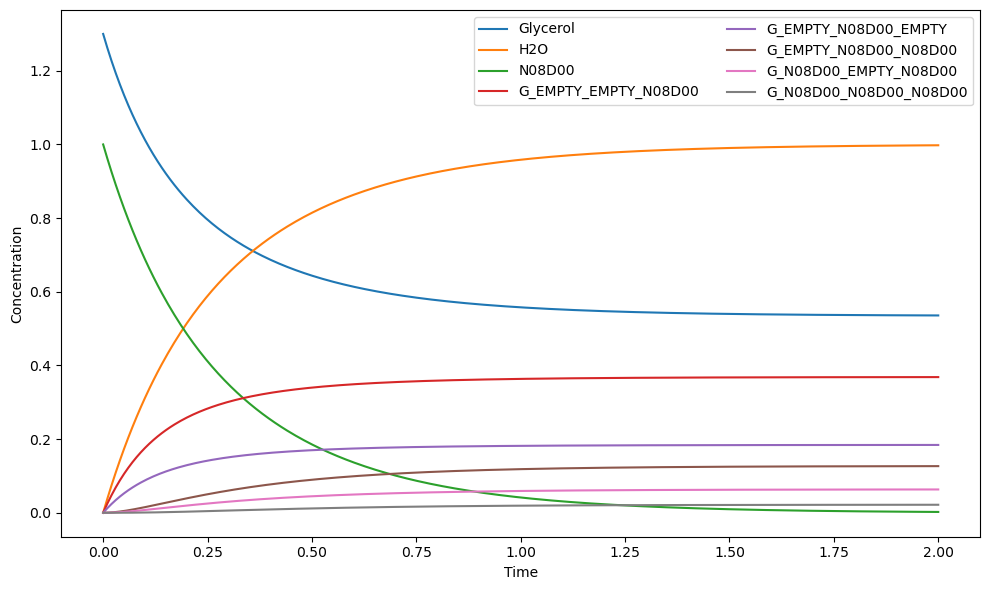

: 

In [1]:
from glyze import FattyAcid, Glyceride, Esterifier, GlycerideMix
from rdkit import Chem

# data set
fa2 = FattyAcid(length=2)
fa3 = FattyAcid(length=3)
fa4 = FattyAcid(length=4)
fa5 = FattyAcid(length=5)
fa6 = FattyAcid(length=6)
fa7 = FattyAcid(length=7)
fa8 = FattyAcid(length=8)
fa9 = FattyAcid(length=9)
fa10 = FattyAcid(length=10)
fa11 = FattyAcid(length=11)
fa12 = FattyAcid(length=12)
fa13 = FattyAcid(length=13)
fa14 = FattyAcid(length=14)
fa15 = FattyAcid(length=15)
fa16 = FattyAcid(length=16)
fa17 = FattyAcid(length=17)
fa18 = FattyAcid(length=18)
fa19 = FattyAcid(length=19)
fa20 = FattyAcid(length=20)
fa21 = FattyAcid(length=21)
fa22 = FattyAcid(length=22)

# glycerol
Gly = Glyceride(sn=(None, None, None))
glym = Gly.molar_mass

# sanity check:
mct = Glyceride(sn=(fa8, fa8, fa10))
mctm = mct.molar_mass

# water
"""Calculate the molar mass of the water in g/mol"""
# Build RDkit molecule and sum atomic masses
# Initialize empty RWMol
rw = Chem.RWMol()
# oxygen
o = rw.AddAtom(Chem.Atom(8)) 

# Connect to water
mol = rw.GetMol()
Chem.SanitizeMol(mol)
mol = Chem.AddHs(mol)

h2omass = 0
for atom in mol.GetAtoms():
    h2omass += atom.GetMass()

# testing for esterification
sim = Esterifier.p_kinetic_esterification(list_of_fa=[fa8], initial_conc = [1.3, 1], chem_flag=True)
list_of_rxns = Esterifier.p_kinetic_esterification_rxn_list(list_of_fa=[fa8])
sim.overall_order = 2
sol = sim.solve(t_span=(0.0, 2))
# y_t2 = sol.sol(2.0)  # returns full state vector at t=2
# print(y_t2)

# Once you run the solver, you can use the property attribute below to then grab the GlycerideMix object which contains a dictionary of the mixture 
mix = sim.glyceride_mix
# mix.to_csv('../../MCT8_10_esterified.csv')
# mix2 = Glyceride.from_csv('../../csv_path.csv')
print(mix.mix)

# I also allowed you to separate the fatty acids and glycerides if you wanted to study them separately: 
gly_list = mix.glyceride_list
fa_list = mix.fa_list


sim.plot(sol=sol)
print(list_of_rxns)
# tabulated

